In [ ]:
import sys
path = ['', 'C:\\Program Files\\Python37\\Lib\\idlelib', 'C:\\Program Files\\Python37\\python37.zip', 'C:\\Program Files\\Python37\\DLLs', 'C:\\Program Files\\Python37\\lib', 'C:\\Program Files\\Python37', 'C:\\Users\\anujk\\AppData\\Roaming\\Python\\Python37\\site-packages', 'C:\\Program Files\\Python37\\lib\\site-packages', 'C:\\Program Files\\Python37\\lib\\site-packages\\win32', 'C:\\Program Files\\Python37\\lib\\site-packages\\win32\\lib', 'C:\\Program Files\\Python37\\lib\\site-packages\\Pythonwin', 'C:\\Program Files\\Python37\\lib\\site-packages\\IPython\\extensions', '..']
for i in path: 
    sys.path.append(i)

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
train_images[0][27]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

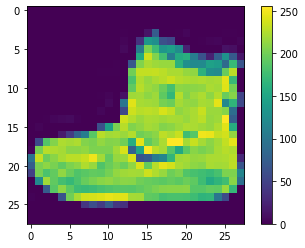

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 187us/sample - loss: 0.4962 - accuracy: 0.8256
Epoch 2/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.3716 - accuracy: 0.8652
Epoch 3/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.3338 - accuracy: 0.8782
Epoch 4/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.3115 - accuracy: 0.8848
Epoch 5/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2913 - accuracy: 0.8928
Epoch 6/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.2778 - accuracy: 0.8969
Epoch 7/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.2665 - accuracy: 0.9008
Epoch 8/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2557 - accuracy: 0.9052
Epoch 9/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.2441 - accuracy: 0.9092
Epoc

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2333 - accuracy: 0.8766

Test accuracy: 0.8766


In [ ]:
predictions = model.predict(test_images)

In [ ]:
im = plt.imread(r'C:\Users\anujk\Downloads\shirt.png')

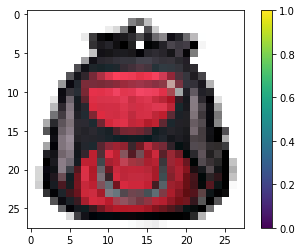

In [ ]:
plt.figure()
plt.imshow(im)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
import cv2
new = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

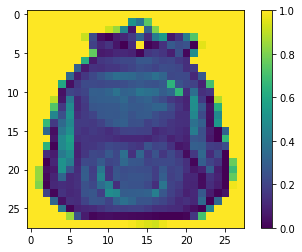

In [ ]:
plt.imshow(new)
plt.colorbar()

In [ ]:
for i in range(28):
    for j in range(28):
        new[i][j] = 1- new[i][j]

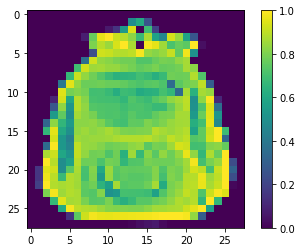

In [ ]:
plt.imshow(new)
plt.colorbar()

In [ ]:
new = (np.expand_dims(new,0))

In [ ]:
class_names[np.argmax(model.predict([new]))]

'Coat'

In [ ]:
ar = model.predict([new])

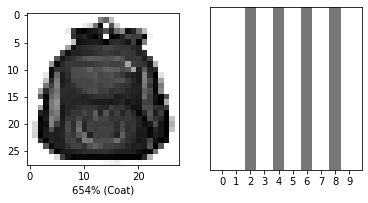

In [ ]:

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(new[0], cmap=plt.cm.binary)
plt.xlabel("{:2.0f}% ({})".format(100*np.max(ar[0]),class_names[np.argmax(model.predict([new]))]))
plt.subplot(1,2,2)
plt.xticks(range(10))
plt.yticks([])
thisplot = plt.bar(range(10),ar[0] , color="#777777")
plt.ylim([0, 1])
predicted_label = np.argmax(ar[0])
plt.show()

In [ ]:
ar[0]

array([ -4.7635174, -10.673027 ,  -3.8024437,  -5.87213  ,  -8.289651 ,
         2.032954 ,  -6.355317 ,  -6.525505 ,  -1.5048354, -14.028353 ],
      dtype=float32)

In [ ]:
class_names

NameError: ignored